In [5]:
import os
import re
import json
import pandas as pd

pd.set_option('display.max_colwidth', 50)  # Ensure full content in cells is shown
pd.set_option('display.max_columns', 50)  # Display all columns
pd.set_option('display.max_rows', 100)  # Set maximum rows to display
pd.set_option('display.width', 1000)  # Set the display width for better formatting

## 1. Repositiories of Data

In [8]:
labels_dict = {'jabref': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\jabref_labels.txt',
            'sweetHome': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\sweethome3d_labels.txt',
            'ant': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\ant_labels.txt',
            'prom': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\prom_labels.txt',
            'teammates': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\teammates_labels.txt',
            'argouml': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\argouml_labels.txt',                   
            'lucene': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\lucene_labels.txt',
            'common': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\commons-imaging_labels.txt',        
}

roots = {
    'jabref': 'net/sf/jabref/',
    'sweetHome': 'com/eteks/sweethome3d/',
    'ant': 'org/apache/tools/',
    'prom': 'org/processmining/',
    'teammates': 'teammates',
    'argouml': 'org/argouml/',
    'lucene': 'org/apache/lucene/',
    'common': 'org/apache/commons/imaging/'
}

In [10]:
def load_labels(labels_path):
    """Loads and parses the labels file into a structured dictionary."""
    with open(labels_path, 'r') as file:
        content = file.read()

    lines = content.split('\n')
    labels_data = {
        'mapping': [],
        'relations': [],
    }

    current_section = None
    for line in lines:
        line = line.strip()
        if not line or line.startswith('#'):
            if line.startswith('# mapping'):
                current_section = 'mapping'
            elif line.startswith('# relations'):
                current_section = 'relations'
            continue

        if current_section == 'mapping':
            map_file = line.split()
            if len(map_file) == 2:
                labels_data['mapping'].append({'Module': map_file[0], 'File': map_file[1]})
        elif current_section == 'relations':
            source_target = line.split()
            if len(source_target) == 2:
                labels_data['relations'].append({'Source': source_target[0], 'Target': source_target[1]})
    
    labels = pd.DataFrame(labels_data['mapping'])
    architecture = pd.DataFrame(labels_data['relations'])

    return architecture, labels

architecture, labels = load_labels(labels_dict['jabref'])
roots

{'jabref': 'net/sf/jabref/',
 'sweetHome': 'com/eteks/sweethome3d/',
 'ant': 'org/apache/tools/',
 'prom': 'org/processmining/',
 'teammates': 'teammates',
 'argouml': 'org/argouml/',
 'lucene': 'org/apache/lucene/',
 'common': 'org/apache/commons/imaging/'}

In [2]:
def read_and_flatten_json(file_path, encoding='utf-8'):
    """
    Reads a newline-delimited JSON file, flattens it, and returns the flattened DataFrame.
    """
    flattened_data_list = []
    try:
        with open(file_path, encoding=encoding) as f:
            for line in f:
                try:
                    data = json.loads(line)
                    flattened_data_list.append(pd.json_normalize(data))
                except json.JSONDecodeError as e:
                    print(f"Error decoding line: {line} -> {e}")
        flattened_data = pd.concat(flattened_data_list, ignore_index=True)

    except UnicodeDecodeError:
        with open(file_path, encoding='latin-1') as f:
            for line in f:
                try:
                    data = json.loads(line)
                    flattened_data_list.append(pd.json_normalize(data))
                except json.JSONDecodeError as e:
                    print(f"Error decoding line: {line} -> {e}")

        flattened_data = pd.concat(flattened_data_list, ignore_index=True)
        
    return flattened_data

In [3]:
df_argouml = read_and_flatten_json('argouml.json')
df_ant = read_and_flatten_json('ant.json')
df_prom = read_and_flatten_json('prom.json')
df_jabref = read_and_flatten_json('jabref.json')
df_sweetHome = read_and_flatten_json('sweethome3d.json')
df_team = read_and_flatten_json('teammates.json')
df_lucene = read_and_flatten_json('lucene.json')
df_ci = read_and_flatten_json('commons-imaging.json')



In [4]:
df_ci

,name,isInner,isAnonymous,lineCount,fieldCount,methods,deps,texts
0,java.awt.Color,False,False,0,0,[],[],[]
1,java.io.RandomAccessFile,False,False,0,0,[],[],[]
2,org.apache.commons.imaging.common.itu_t4.T4_T6...,True,False,10,2,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.common...,"[bitString, value, <init>, bitString, value, w..."
3,org.apache.commons.imaging.common.itu_t4.T4_T6...,False,False,23,22,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.common...,"[WHITE_TERMINATING_CODES, BLACK_TERMINATING_CO..."
4,org.apache.commons.imaging.formats.tiff.taginf...,False,False,4,0,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.format...,"[<init>, name, tag, length, directoryType, get..."
...,...,...,...,...,...,...,...,...
479,org.apache.commons.imaging.formats.gif.ImageDe...,False,False,13,11,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.format...,"[imageLeftPosition, imageTopPosition, imageWid..."
480,org.apache.commons.imaging.formats.pcx.RleReader,False,False,26,3,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.format...,"[isCompressed, count, sample, <init>, isCompre..."
481,org.apache.commons.imaging.formats.png.PngCons...,False,False,3,11,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.format...,"[COMPRESSION_DEFLATE_INFLATE, 0, PNG_SIGNATURE..."
482,org.apache.commons.imaging.icc.IccTagDataType,False,False,0,0,"[{'name': 'getName', 'isAbstract': True, 'isSy...",[{'source': 'org.apache.commons.imaging.icc.Ic...,"[getName, getSignature, dump]"


In [5]:
def cleaning(df, root):
    df=df.copy()
    df.rename(columns={'name': 'Entity'}, inplace=True)
    df.Entity = df.Entity.apply(lambda x: x.replace('.','/'))
    df = df[df.Entity.str.contains('org/apache/lucene')]
    df.loc[:, 'Entity'] = df['Entity'].apply(lambda x: x.split('$')[0])
    df = df[~df.Entity.str.contains('package-info')]
    df['File'] = df.Entity.apply(lambda x: x.split(root)[1])
    return df

df_argouml = cleaning(df_argouml,roots['argouml'])
df_ant = cleaning(df_ant,roots['ant'])
df_prom = cleaning(df_prom,roots['prom'])
df_jabref = cleaning(df_jabref,roots['jabref'])
df_sweetHome = cleaning(df_sweetHome,roots['sweetHome'])
df_team = cleaning(df_team,roots['teammates'])
df_lucene = cleaning(df_lucene,roots['lucene'])
df_common = cleaning(df_ci,roots['common'])

In [6]:
df=df_ci.copy()
df.rename(columns={'name': 'Entity'}, inplace=True)
df.Entity = df.Entity.apply(lambda x: x.replace('.','/'))
df = df[df.Entity.str.contains('org/apache/commons/imaging')]
df.loc[:, 'Entity'] = df['Entity'].apply(lambda x: x.split('$')[0])
df = df[~df.Entity.str.contains('package-info')]

In [8]:
def extract_and_filter_dependencies(df):
    deps_list = []
    entity_set = set(df['Entity'])
    
    for deps in df['deps']:
        if isinstance(deps, list):
            deps_list.extend(deps)

    # Create DataFrame from dependencies
    deps_df = pd.DataFrame(deps_list)
    deps_df['source'] = deps_df['source'].apply(lambda x: x.replace('.','/'))
    deps_df['target'] = deps_df['target'].apply(lambda x: x.replace('.','/'))

    deps_df = deps_df[deps_df['source'].isin(entity_set) & deps_df['target'].isin(entity_set)]
    deps_df.drop_duplicates(inplace=True)
    deps_df.rename(columns={'source': 'Source', 'target': 'Target', 'type': 'Dependency_Type', 'count': 'Dependency_Count'}, inplace=True)
    
    return deps_df

#dep_argouml = extract_and_filter_dependencies(df_argouml)
#dep_ant = extract_and_filter_dependencies(df_ant)
#dep_prom = extract_and_filter_dependencies(df_prom)
#dep_jabref = extract_and_filter_dependencies(df_jabref)
#dep_sweetHome = extract_and_filter_dependencies(df_sweetHome)
#dep_team = extract_and_filter_dependencies(df_team)
#dep_lucene = extract_and_filter_dependencies(df_lucene)
dep_common = extract_and_filter_dependencies(df)

In [9]:
dep_common

,Source,Target,Dependency_Type,Dependency_Count
5,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/taginf...,Extends,1
6,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/consta...,Argument,1
7,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/fieldt...,FieldUse,1
8,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/taginf...,ConstructorCall,1
11,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/common/ByteConversions,MethodCall,2
...,...,...,...,...
5583,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/fieldt...,Field,1
5584,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/consta...,Argument,1
5585,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/taginf...,ConstructorCall,1
5586,org/apache/commons/imaging/formats/tiff/taginf...,org/apache/commons/imaging/formats/tiff/fieldt...,ConstructorCall,1


In [11]:
def clean_and_merge_entities(df):
    # Step 1: Clean the 'texts' column
    def clean_text_tokens(texts):
        cleaned_texts = []
        for token in texts:
            if re.fullmatch(r'[\n\t]{1,}', token):  # Matches tokens like [\n], [\n\n], or [\t]
                continue
            if len(token) == 1:
                continue
            if token.isdigit() or not any(char.isalpha() for char in token):
                continue
            if token in ['<init>', '<clinit>', '<p>']:
                continue

            # Remove ':' and clean token
            token = token.replace(':', '')
            token = token.replace(',', '')
            token = token.replace('$', '')
            cleaned_texts.append(token)

        return cleaned_texts

    # Apply cleaning to each row in the 'texts' column
    df['texts'] = df['texts'].apply(lambda x: clean_text_tokens(x) if isinstance(x, list) else [])

    # Step 2: Merge rows with duplicate 'Entity' values
    merged_df = (
        df.groupby('Entity', as_index=False)
        .agg({
            'texts': lambda x: list(set(sum(x, []))),  # Deduplicate and merge text lists
            **{col: 'first' for col in df.columns if col not in ['Entity', 'texts']}
        })
    )

    return merged_df

df_argouml = clean_and_merge_entities(df_argouml)
df_ant = clean_and_merge_entities(df_ant)
df_prom = clean_and_merge_entities(df_prom)
df_jabref = clean_and_merge_entities(df_jabref)
df_sweetHome = clean_and_merge_entities(df_sweetHome)
df_team = clean_and_merge_entities(df_team)
df_lucene = clean_and_merge_entities(df_lucene)


In [12]:
df = clean_and_merge_entities(df)

In [13]:
df

,Entity,texts,isInner,isAnonymous,lineCount,fieldCount,methods,deps
0,org/apache/commons/imaging/ColorTools,"[colorModel, count, csFrom, csTo, convertBetwe...",False,False,73,0,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.ColorT...
1,org/apache/commons/imaging/FormatCompliance,"[expected, comment, false, sw, dump, bounds ...",False,False,82,4,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.Format...
2,org/apache/commons/imaging/ImageDump,"[bytes, CS_PYCC, no props, dump, dumpBIProps,...",False,False,42,1,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.ImageD...
3,org/apache/commons/imaging/ImageFormat,"[getName, getExtension]",False,False,0,0,"[{'name': 'getName', 'isAbstract': True, 'isSy...",[]
4,org/apache/commons/imaging/ImageFormats,"[ICO, Lorg/apache/commons/imaging/ImageFormats...",False,False,28,22,"[{'name': 'values', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.ImageF...
...,...,...,...,...,...,...,...,...
324,org/apache/commons/imaging/palette/MostPopulat...,"[lowerGroup, ignoreAlpha, lowerColors, colorCo...",False,False,77,0,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.palett...
325,org/apache/commons/imaging/palette/Palette,"[length, getPaletteIndex, getEntry]",False,False,0,0,"[{'name': 'getPaletteIndex', 'isAbstract': Tru...",[{'source': 'org.apache.commons.imaging.palett...
326,org/apache/commons/imaging/palette/PaletteFactory,"[bestV, 1.7976931348623157E308, first, sliceMi...",False,False,271,2,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.palett...
327,org/apache/commons/imaging/palette/QuantizedPa...,"[straight, index, precision, subsets, precisio...",False,False,23,3,"[{'name': '<init>', 'isAbstract': False, 'isSy...",[{'source': 'org.apache.commons.imaging.palett...


# 1.1 Mapping the System Module and Java Code Entities



In [14]:
data_dict = {'jabref': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\jabref_labels.txt',
            'sweetHome': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\sweethome3d_labels.txt',
            'ant': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\ant_labels.txt',
            'prom': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\prom_labels.txt',
            'teammates': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\teammates_labels.txt',
            'argouml': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\argouml_labels.txt',                   
            'lucene': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\lucene_labels.txt',
            'common': r'C:\Users\JABEERAK\GNN_CodeMapping\Code\Data Preprocessing\cimg_labels.txt',        
}

In [15]:
labels_path = data_dict['common']



### Getting True Labels of All Modules

In [16]:
with open(labels_path, 'r') as file:
    content = file.read()
lines = content.split('\n') 
labels_data = {
    'mapping': [],
    'relations': [],
    'initial_mapping': []
}

lines = content.split('\n')
current_section = None
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace
    if not line or line.startswith('#'):  # Skip empty lines and comments
        if line.startswith('# mapping'):
            current_section = 'mapping'
        elif line.startswith('# relations'):
            current_section = 'relations'
        elif line.startswith('# initial mapping'):
            current_section = 'initial_mapping'
        continue

    if current_section == 'mapping':
        map_file = line.split()
        if len(map_file) == 2:  # Ensure there are exactly two items
            labels_data['mapping'].append({
                'Module': map_file[0],
                'Entity': map_file[1]
            })
    elif current_section == 'relations':
        source_target = line.split()
        if len(source_target) == 2:  # Ensure there are exactly two items
            labels_data['relations'].append({
                'Source': source_target[0],
                'Target': source_target[1]
            })
    elif current_section == 'initial_mapping':
        map_file = line.split()
        if len(map_file) == 2:  # Ensure there are exactly two items
            labels_data['initial_mapping'].append({
                'Module': map_file[0],
                'Entity': map_file[1]
            })

# Create DataFrames for modules, mappings, relations, and initial mappings
allowed_dependencies = pd.DataFrame(labels_data['mapping'])
allowed_dependencies.Entity = allowed_dependencies.Entity.str.replace('..', '.')
allowed_dependencies.Entity = allowed_dependencies.Entity.str.replace('\\.', '/')
allowed_dependencies.Entity = allowed_dependencies.Entity.str.replace('*', '.*')
allowed_dependencies['Entity'] = allowed_dependencies['Entity'].str.replace(r"\(\?:\?!", r"(?!", regex=True ) # Replace (?:?! with (?!)

df_relations = pd.DataFrame(labels_data['relations'])
#df_initial_mapping = pd.DataFrame(labels_data['initial_mapping'])
df_relations.to_csv(r'C:\Users\JABEERAK\GNN_CodeMapping\Code\GNN_Models\Processed_data\cimg_relations.csv', index=False)
#df_initial_mapping.to_csv(os.path.join(labels_path.rsplit('\\', 1)[0], 'Tobias_initial_mapping.csv'), index=False)

In [17]:
allowed_dependencies

,Module,Entity
0,common,org/apache/commons/imaging/common/.*
1,bmp,org/apache/commons/imaging/formats/bmp/.*
2,dcx,org/apache/commons/imaging/formats/dcx/.*
3,gif,org/apache/commons/imaging/formats/gif/.*
4,icns,org/apache/commons/imaging/formats/icns/.*
5,ico,org/apache/commons/imaging/formats/ico/.*
6,jpeg,org/apache/commons/imaging/formats/jpeg/.*
7,color,org/apache/commons/imaging/color/.*
8,pcx,org/apache/commons/imaging/formats/pcx/.*
9,png,org/apache/commons/imaging/formats/png/.*


## Retrieving Code Files

In [18]:
def get_module(df, allowed_dependencies):
    df=df.copy()
    df['Module'] = None

    # Iterate through each mapping and assign modules
    for _, row in allowed_dependencies.iterrows():
        file_pattern = row['Entity']
        module = row['Module']
        
        # Apply regex matching to update the 'Module' column
        df.loc[df['Entity'].str.contains(file_pattern, regex=True, na=False), 'Module'] = module

    # Create a new DataFrame with File_ID
    dff = df.copy()
    dff['File_ID'] = range(1, len(dff) + 1)
    dff = dff[['File_ID', 'Entity', 'Module', 'texts']]
    dff.rename(columns={'texts': 'Code'}, inplace=True)
    dff = dff[~dff.Module.isna()]

    file_id_map = dict(zip(dff['Entity'], dff['File_ID']))
    return dff, file_id_map


In [19]:
dff, file_id_map =  get_module(df,allowed_dependencies)

C:\Users\JABEERAK\AppData\Local\Temp\ipykernel_14080\1919450323.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Entity'].str.contains(file_pattern, regex=True, na=False), 'Module'] = module


In [20]:
dff.Module.value_counts(dropna=False)

Module
tiff        105
png          38
jpeg         37
common       32
psd          16
palette      16
pnm          13
base         13
gif          11
bmp          11
color        10
icc           9
pcx           5
icns          4
rgbe          3
ico           1
dcx           1
wbmp          1
xbm           1
xpm           1
internal      1
Name: count, dtype: int64

In [21]:
len(dff.Module.unique())

21

In [22]:
dff.to_csv(r'C:\Users\JABEERAK\GNN_CodeMapping\Code\GNN_Models\Processed_data\cimaging_data.csv',index=False)

### Getting Dependecies 

In [23]:
##########################################################
#################### Dependecies #########################
#########################################################
    
df_dep = dep_common
dff = dff.copy()

# Merge for Source_Module using 'Source' in df_dep and 'Entity' in dff
df_merged_source = pd.merge(df_dep, dff[['Entity', 'Module']], left_on='Source', right_on='Entity', how='left')
df_merged_source = df_merged_source.rename(columns={'Module': 'Source_Module'}).drop(columns=['Entity'])

# Merge for Target_Module using 'Target' in df_dep and 'Entity' in dff
df_merged_target = pd.merge(df_merged_source, dff[['Entity', 'Module']], left_on='Target', right_on='Entity', how='left')
df_merged_target = df_merged_target.rename(columns={'Module': 'Target_Module'}).drop(columns=['Entity'])

df_dep = df_merged_target.copy()
df_dep = df_dep[(~df_dep.Source_Module.isna()) & (~df_dep.Target_Module.isna())]
df_dep['Source_ID'] = df_dep['Source'].map(file_id_map)
df_dep['Target_ID'] = df_dep['Target'].map(file_id_map)

# Final selected columns
df_dep = df_dep[['Source_ID', 'Source', 'Source_Module','Target_ID', 'Target', 'Target_Module', 'Dependency_Type', 'Dependency_Count']]
allowed_set = set(zip(df_relations['Source'], df_relations['Target']))
df_dep['Allowed'] = df_dep.apply(
    lambda row: 1 if (row['Source_Module'], row['Target_Module']) in allowed_set or row['Source_Module'] == row['Target_Module']
    else 0,
    axis=1
)
df_dep = df_dep[df_dep.Source != df_dep.Target]

df_dep.drop_duplicates(inplace=True)


In [25]:
df_dep

,Source_ID,Source,Source_Module,Target_ID,Target,Target_Module,Dependency_Type,Dependency_Count,Allowed
0,267,org/apache/commons/imaging/formats/tiff/taginf...,tiff,255,org/apache/commons/imaging/formats/tiff/taginf...,tiff,Extends,1,1
1,267,org/apache/commons/imaging/formats/tiff/taginf...,tiff,227,org/apache/commons/imaging/formats/tiff/consta...,tiff,Argument,1,1
2,267,org/apache/commons/imaging/formats/tiff/taginf...,tiff,235,org/apache/commons/imaging/formats/tiff/fieldt...,tiff,FieldUse,1,1
3,267,org/apache/commons/imaging/formats/tiff/taginf...,tiff,255,org/apache/commons/imaging/formats/tiff/taginf...,tiff,ConstructorCall,1,1
4,267,org/apache/commons/imaging/formats/tiff/taginf...,tiff,30,org/apache/commons/imaging/common/ByteConversions,common,MethodCall,2,1
...,...,...,...,...,...,...,...,...,...
3052,263,org/apache/commons/imaging/formats/tiff/taginf...,tiff,235,org/apache/commons/imaging/formats/tiff/fieldt...,tiff,Field,1,1
3053,263,org/apache/commons/imaging/formats/tiff/taginf...,tiff,227,org/apache/commons/imaging/formats/tiff/consta...,tiff,Argument,1,1
3054,263,org/apache/commons/imaging/formats/tiff/taginf...,tiff,269,org/apache/commons/imaging/formats/tiff/taginf...,tiff,ConstructorCall,1,1
3055,263,org/apache/commons/imaging/formats/tiff/taginf...,tiff,240,org/apache/commons/imaging/formats/tiff/fieldt...,tiff,ConstructorCall,1,1


In [26]:
df_dep.to_csv(r'C:\Users\JABEERAK\GNN_CodeMapping\Code\GNN_Models\Processed_data\cimaging_dependencies.csv',index=False)
df_dep.shape

(2916, 9)

### Dependencies Analaysis

NameError: name 'nx' is not defined

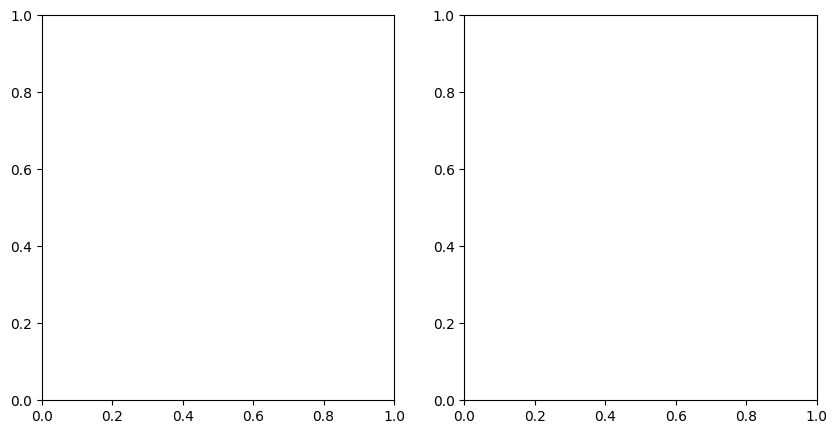

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# First Graph: Jabref True Modules Structure
G1 = nx.DiGraph()
edges1 = list(zip(allowed_dependencies['Source'], allowed_dependencies['Target']))
G1.add_edges_from(edges1)
pos1 = nx.circular_layout(G1)

# Draw the first graph
nx.draw_networkx_nodes(G1, pos1, node_shape='s', node_size=2500, node_color='skyblue', alpha=0.3, ax=axs[0])
nx.draw_networkx_edges(G1, pos1, arrowstyle='->', arrowsize=20, edge_color='grey', width=1.5, ax=axs[0])
nx.draw_networkx_labels(G1, pos1, font_size=11, font_family='sans-serif', ax=axs[0])
axs[0].set_title("Jabref True Modules Structure", fontsize=14)
axs[0].axis('off')

# Second Graph: Dependencies within Files
G2 = nx.DiGraph()
edges2 = [(source, target) for source, target in zip(df_dep['Source_Module'], df_dep['Target_Module']) if source != target]
G2.add_edges_from(edges2)
pos2 = nx.circular_layout(G2)
nx.draw_networkx_nodes(G2, pos2, node_shape='s', node_size=2500, node_color='skyblue', alpha=0.3, ax=axs[1])
nx.draw_networkx_edges(G2, pos2, arrowstyle='->', arrowsize=20, edge_color='grey', width=1.5, ax=axs[1])
nx.draw_networkx_labels(G2, pos2, font_size=11, font_family='sans-serif', ax=axs[1])
axs[1].set_title("Dependencies within Files", fontsize=14)
axs[1].axis('off')
plt.tight_layout()  
plt.show()
